# Linear Regression Assignment
**By Wasim Khan**

## Problem Statement 

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

## Business Goal

Goal is to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



## Step 1: Reading and Understanding the Data

Let us first import the important libraries and read the housing dataset

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

In [2]:
# Supress Warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the csv file
pd.set_option('display.max_columns', None)
day = pd.read_csv("day.csv")
day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [4]:
# checking the shape of the dataset
day.shape

(730, 16)

##### Day dataset has 730 rows and 16 columns
Lets check how many null values

In [5]:
# checking the info
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### No Null values found in any columns

In [7]:
# Checking numeric values data
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### Dropping columns that are unwanted for our model

- As 'cnt' variable indicates the total number of bike rentals, including both **casual and registered**. Hence casual and registered can be dropped.


- **'instant'** is a record index which wont be required in the regression so it can be excluded.


- As dataset already contains the 'temp' variable which defines the actual temperature, **'atemp'** can be dropped too.


- Dataset already has business driven derived variables such as weekday, months and years. So, we can remove **'dteday'** variable as it wont be significant in our regression

In [8]:
# dropping not required and redundant variable
day = day.drop(['instant','dteday','atemp','casual','registered'], axis=1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [9]:
# checking shape of the dataset
day.shape

(730, 11)

Now, we have 11 columns for building our model

### Data Visualisation

We need to update the values of the categorical variables from the **Data Dictionary** in order to make a reasonable visualization.

So we will create a another dataset with relevant catagorical values

In [10]:
df = day
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


Let us see the corelation between the variable, more precisely with our target variable cnt (bike count)

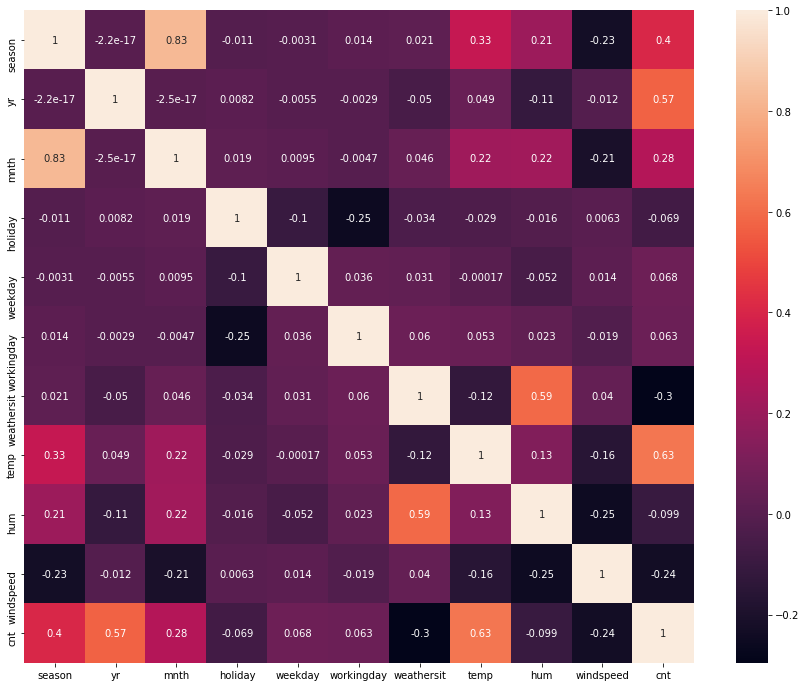

In [11]:
#heatmap
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Handling Categorical variables 
#### Data Preparation

In [12]:
# converting Month number to Month Name
import calendar
df['mnth'] = df['mnth'].apply(lambda x: calendar.month_abbr[x])
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,Jan,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,Jan,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,Jan,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,Jan,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,Jan,0,3,1,1,9.305237,43.6957,12.522300,1600


In [13]:
# converting Day number to Day Name
df['weekday'] = df['weekday'].apply(lambda x: calendar.day_abbr[x])
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,Jan,0,Sun,0,2,14.110847,80.5833,10.749882,985
1,1,0,Jan,0,Mon,0,2,14.902598,69.6087,16.652113,801
2,1,0,Jan,0,Tue,1,1,8.050924,43.7273,16.636703,1349
3,1,0,Jan,0,Wed,1,1,8.200000,59.0435,10.739832,1562
4,1,0,Jan,0,Thu,1,1,9.305237,43.6957,12.522300,1600


In [14]:
# Changing values of Season and Weather situation based on dictionary data

def season(x):
    if x == 1:
        return "spring"
    elif x == 2:
        return "summer"
    elif x ==3:
        return "fall"
    elif x == 4:
        return "winter"
    

def weathersit(x):
    if x == 1:
        return "Clear/Partly Cloudy"
    if x == 2:
        return "Mist/Broken Clouds"
    if x == 3:
        return "Light Snow/Light Rain"
    if x == 4:
        return "Heavy Rain/Snow & Fog"
    


df['season'] = df['season'].apply(lambda x: season(x))
df['weathersit'] = df['weathersit'].apply(lambda x: weathersit(x))

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sun,0,Mist/Broken Clouds,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Mon,0,Mist/Broken Clouds,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Thu,1,Clear/Partly Cloudy,9.305237,43.6957,12.522300,1600


In [15]:
# converting Year to 2018 or 2019
# This step is done only for better visualization of data and will be reverted later

df['yr'] = df['yr'].apply(lambda x: 2019 if x==1 else 2018)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,0,Sun,0,Mist/Broken Clouds,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,Mon,0,Mist/Broken Clouds,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,Tue,1,Clear/Partly Cloudy,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,0,Wed,1,Clear/Partly Cloudy,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,0,Thu,1,Clear/Partly Cloudy,9.305237,43.6957,12.522300,1600


In [16]:
# converting to Yes/No of Holiday and Working day
# This step is done only for better visualization of data and will be reverted later

df['holiday'] = df['holiday'].apply(lambda x: 'Yes' if x==1 else 'No')
df['workingday'] = df['workingday'].apply(lambda x: 'Yes' if x==1 else 'No')
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,No,Sun,No,Mist/Broken Clouds,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,No,Mon,No,Mist/Broken Clouds,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,No,Tue,Yes,Clear/Partly Cloudy,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,No,Wed,Yes,Clear/Partly Cloudy,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,No,Thu,Yes,Clear/Partly Cloudy,9.305237,43.6957,12.522300,1600


#### Visualizing of numeric variables

<Figure size 864x864 with 0 Axes>

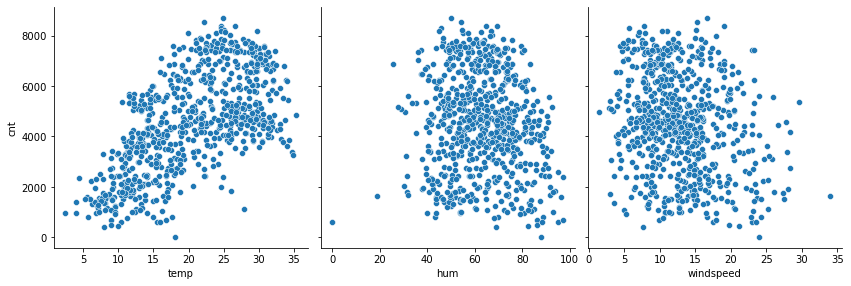

In [17]:
plt.figure(figsize=(12,12))
sns.pairplot(df,x_vars=['temp','hum','windspeed'], y_vars='cnt', size=4, aspect=1, kind='scatter',diag_kind = None)
plt.show()

#### Inference from numerical variables:

- Temperature is highly correlated with target variable cnt.

- Not much correlation could be inferred from Humidity and Windspeed

#### Visualizing of categorical variables


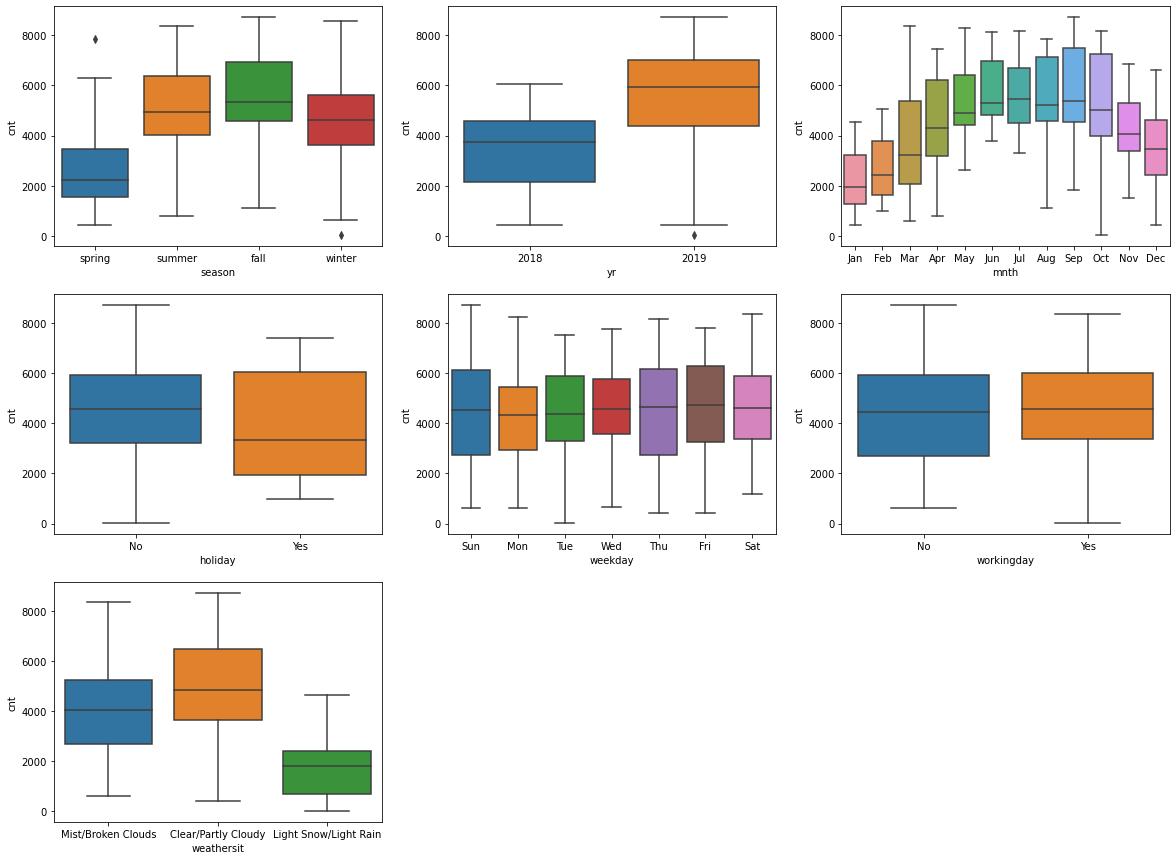

In [18]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt', data=df)


plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt', data=df)


plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt', data=df)


plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt', data=df)


plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt', data=df)


plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt', data=df)


plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt', data=df)
plt.show()

#### Inference from categorical variables:

•	**Season:**
1. Count of bikes are less in Spring season as compared to other seasons
2. Fall has large number of count of bikes.
3. Minimum values in all the four seasons lies in the same range: 0-2000, whereas Maximum values in Spring is in between 6000 and 8000 where as in other three seasons, Summer, Fall and Winter", it is above 8000.

•	**Year:**
1. There are fewer counts of bikes in 2018 than that in 2019
2. The median count is below 4000 in 2018 and approximately 6000 in 2019
3. Year also has high positive correlation coefficient with count of bikes i.e., 0.57

•	**Month:**
1. Demand increases continuously till June and there is decrease in demand after September.
2. The maximum demand is in the month of September.

•	**Holiday:**
1. For variable Holiday, it is seen that the demand decreases when there is a holiday.

•	**Weekday:**
1. Count of bikes is least on Tuesday and highest on Sunday.
2. Irrespective of the day of the week, the average count of bike lies in the range 4000-6000.

•	**Working day:**
1. There is no significant analysis can be concurred for Working day variable.

•	**Weather situation:**
1. Maximum booking happened in the 'Clear, Few clouds, Partly cloudy, Partly cloudy' weather condition.
2. ‘Light snow/Light rain’ weather condition has lowest number of bike counts.


## Step 2 : Preparing the data

1. Encoding:
    
    - Converting binary variable to 1's and 0's
    
    - Other categorical variables to dummy variables
    
    
2. Splitting into train and test


3. Rescalling of the variables

### 1. Encoding

#### Converting binary variable to 1's and 0's

In [19]:
#lets take a look how our Dataset looks like after association is done from the Dictionary
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,No,Sun,No,Mist/Broken Clouds,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,No,Mon,No,Mist/Broken Clouds,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,No,Tue,Yes,Clear/Partly Cloudy,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,No,Wed,Yes,Clear/Partly Cloudy,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,No,Thu,Yes,Clear/Partly Cloudy,9.305237,43.6957,12.522300,1600


As we have done the representation for the above visualization we can now revert the Yes/No variables to 0's and 1's

In [20]:
# converting to Yes/No of Holiday and Working day

# converting Year to 2018 or 2019

df['yr'] = df['yr'].apply(lambda x: 1 if x==2019 else 0)
df['holiday'] = df['holiday'].apply(lambda x: 1 if x=='Yes' else 0)
df['workingday'] = df['workingday'].apply(lambda x: 1 if x=='Yes' else 0)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sun,0,Mist/Broken Clouds,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Mon,0,Mist/Broken Clouds,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Thu,1,Clear/Partly Cloudy,9.305237,43.6957,12.522300,1600


### Creation of Dummy variables

#### categorical variables to Dummy variables

In [21]:
#creating function which creates dummy variables for the Categorical variables
#and dropping the redundant data

def addDummyvar(variables, df):
    for x in variables:
        new_df = pd.get_dummies(df[x], drop_first=True)
        df = pd.concat([df,new_df], axis=1)
        df = df.drop(x, axis=1)
    return df

In [22]:
#considering all categorical variables
cat_vars=['season','mnth','weekday','weathersit']
df = addDummyvar(cat_vars,df)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow/Light Rain,Mist/Broken Clouds
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [23]:
df.shape

(730, 29)

### 2. Splitting into train and test

In [24]:
# splitting the dataset into training and testing sets randomly

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [25]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


### 3. Rescalling of the variables

In [26]:

# 1. Instantiate an object
scaler = MinMaxScaler()


#Create list of numeric variables
numerical_vars = ['temp', 'hum', 'windspeed', 'cnt']


#2. Fit in the data
df_train[numerical_vars]=scaler.fit_transform(df_train[numerical_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow/Light Rain,Mist/Broken Clouds
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [27]:
# Checking df_train dataset's scalling
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow/Light Rain,Mist/Broken Clouds
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Every variable is in the range from 0 to 1 after scalling


Now we have data which is converted to a clean format suitable for analysis.

## Step 3: Training the model

##### Dividing into X and Y sets for the model building

In [28]:
# assigning variables as X and y on the training set
y_train = df_train.pop('cnt')
X_train = df_train

In [29]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

**Now let us check two things for considering the variables in our model**

- **Statistical significant of variable**


- **VIF (Variance Inflation factor)**

### Automated approach of feature selection
#### RFE - Recursive Feature Elimination

RFE ranks the features based on their importance and returns top-n features after eliminating the least important features, where n is given by the user.

The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features.

In [30]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [31]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 11),
 ('Mar', False, 13),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 14),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 10),
 ('Sun', True, 1),
 ('Thu', False, 12),
 ('Tue', False, 8),
 ('Wed', False, 9),
 ('Light Snow/Light Rain', True, 1),
 ('Mist/Broken Clouds', True, 1)]

In [32]:
# Columns with Rank 1
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jan', 'Jul', 'Sep', 'Sun', 'Light Snow/Light Rain',
       'Mist/Broken Clouds'],
      dtype='object')

In [33]:
# Columns which can be discarded
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Sat',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

### Building model using statsmodel

##### Model Attempt 1

In [34]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [35]:
# Adding a constant variable to X_train 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [36]:
X_train_rfe

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Jan,Jul,Sep,Sun,Light Snow/Light Rain,Mist/Broken Clouds
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,0,1
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,1,0.824514,0.605840,0.355596,0,1,0,0,0,0,0,0,1
578,1.0,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0
53,1.0,0,0,1,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0
350,1.0,0,0,0,0.248216,0.577930,0.431816,0,0,1,0,0,0,1,0,1


In [37]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()  
lm.params

const                    0.251042
yr                       0.230502
holiday                 -0.058529
workingday               0.043521
temp                     0.509836
hum                     -0.154716
windspeed               -0.185956
spring                  -0.050806
summer                   0.049660
winter                   0.094426
Jan                     -0.034326
Jul                     -0.053193
Sep                      0.081186
Sun                      0.053721
Light Snow/Light Rain   -0.248777
Mist/Broken Clouds      -0.057824
dtype: float64

In [38]:
#Summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          2.31e-191
Time:                        00:22:52   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2510      0.036      6.949      0.000       0.180       0.322
yr                        0.2305      0.008     28.807      0.000       0.215       0.246
holiday                  -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday                0.0435      0.012      3.781      0.000       0.021       0.066
temp                      0.5098      0.034     14.851      0.000       0.442       0.577
hum                      -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed                -0.1860      0.025     -7.301      0.000      -0.236      -0.136
spring                   -0.0508      0.021     -2.461      0.014      -0.091      -0.010
summer                    0.0497      0.015      3.346      0.001       0.020       0.079
winter                    0.0944      0.017      5.479      0.000       0.061       0.128
Jan                      -0.0343      0.017     -1.980      0.048      -0.068      -0.000
Jul                      -0.0532      0.018     -2.947      0.003      -0.089      -0.018
Sep                       0.0812      0.016      4.934      0.000       0.049       0.114
Sun                       0.0537      0.014      3.707      0.000       0.025       0.082
Light Snow/Light Rain    -0.2488      0.026     -9.560      0.000      -0.300      -0.198
Mist/Broken Clouds       -0.0578      0.010     -5.574      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# Calculating the VIFs for the model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']  = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
0,const,84.59
7,spring,5.08
4,temp,3.89
9,winter,3.60
8,summer,2.64
5,hum,1.92
3,workingday,1.88
13,Sun,1.78
10,Jan,1.57
15,Mist/Broken Clouds,1.57


`Jan` has High p-value and Low VIF, is insignificant in presence of other variables; can be dropped

##### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `Jan` as it has a very high p-value of `0.048 `. Let's go ahead and drop this variables

In [40]:
#dropping the variable with high p-value and low VIF and creating the model again
X = X_train_rfe.drop(["Jan"], axis = 1)

##### Model Attempt 2

Rebuilding the model without `Jan`

In [41]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X)

In [42]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [43]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.13e-191
Time:                        00:22:52   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

In [44]:
X.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Jul', 'Sep', 'Sun',
       'Light Snow/Light Rain', 'Mist/Broken Clouds'],
      dtype='object')

In [45]:
X = X.drop(['const'], axis=1)

In [46]:
# Calculating the VIFs for the model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']  = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
4,hum,28.49
3,temp,16.97
2,workingday,5.28
5,windspeed,4.72
6,spring,4.24
8,winter,3.44
7,summer,2.83
13,Mist/Broken Clouds,2.28
0,yr,2.08
11,Sun,1.97


#### Probable steps to consider for choosing variables
    - High p-value and High VIF: remove them
    - High-Low
        - High p-value and low VIF : remove them first
            - Low p-value and High VIF : remove them after the above ones
    - Low p-value and Low VIF

##### Model Attempt 3

In [47]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X)

In [48]:
#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [49]:
#summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.13e-191
Time:                        00:22:52   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2394      0.036      6.696      0.000       0.169       0.310
yr                        0.2297      0.008     28.660      0.000       0.214       0.245
holiday                  -0.0594      0.027     -2.206      0.028      -0.112      -0.006
workingday                0.0432      0.012      3.744      0.000       0.021       0.066
temp                      0.5278      0.033     15.897      0.000       0.463       0.593
hum                      -0.1595      0.037     -4.268      0.000      -0.233      -0.086
windspeed                -0.1806      0.025     -7.110      0.000      -0.231      -0.131
spring                   -0.0554      0.021     -2.694      0.007      -0.096      -0.015
summer                    0.0526      0.015      3.553      0.000       0.024       0.082
winter                    0.1003      0.017      5.890      0.000       0.067       0.134
Jul                      -0.0549      0.018     -3.035      0.003      -0.090      -0.019
Sep                       0.0818      0.016      4.956      0.000       0.049       0.114
Sun                       0.0532      0.015      3.661      0.000       0.025       0.082
Light Snow/Light Rain    -0.2463      0.026     -9.449      0.000      -0.298      -0.195
Mist/Broken Clouds       -0.0578      0.010     -5.559      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       64.879   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.454
Skew:                          -0.661   Prob(JB):                     3.91e-35
Kurtosis:                       5.390   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Calculating the VIFs for the model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']  = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
4,hum,28.49
3,temp,16.97
2,workingday,5.28
5,windspeed,4.72
6,spring,4.24
8,winter,3.44
7,summer,2.83
13,Mist/Broken Clouds,2.28
0,yr,2.08
11,Sun,1.97


`holiday` has High p-value of 0.028 and Low VIF, is insignificant in presence of other variables; can be dropped

##### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `holiday` as it has a very high p-value of `0.028 `. Let's go ahead and drop this variables

In [51]:
#dropping the variable with high p-value and low VIF and creating the model again
X = X.drop(["holiday"], axis = 1)

##### Model Attempt 4

Rebuilding the model without `holiday`

In [52]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X)

In [53]:
#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [54]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          8.51e-192
Time:                        00:22:52   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2298      0.036      6.451      0.000       0.160       0.300
yr                        0.2300      0.008     28.580      0.000       0.214       0.246
workingday                0.0521      0.011      4.790      0.000       0.031       0.073
temp                      0.5279      0.033     15.838      0.000       0.462       0.593
hum                      -0.1578      0.037     -4.209      0.000      -0.232      -0.084
windspeed                -0.1812      0.025     -7.106      0.000      -0.231      -0.131
spring                   -0.0565      0.021     -2.736      0.006      -0.097      -0.016
summer                    0.0530      0.015      3.562      0.000       0.024       0.082
winter                    0.0993      0.017      5.813      0.000       0.066       0.133
Jul                      -0.0537      0.018     -2.962      0.003      -0.089      -0.018
Sep                       0.0797      0.017      4.819      0.000       0.047       0.112
Sun                       0.0622      0.014      4.438      0.000       0.035       0.090
Light Snow/Light Rain    -0.2455      0.026     -9.383      0.000      -0.297      -0.194
Mist/Broken Clouds       -0.0576      0.010     -5.512      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       71.749   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.211
Skew:                          -0.707   Prob(JB):                     3.67e-41
Kurtosis:                       5.601   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Calculating the VIFs for the model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']  = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
3,hum,28.41
2,temp,16.87
1,workingday,4.71
4,windspeed,4.70
5,spring,4.18
7,winter,3.40
6,summer,2.83
12,Mist/Broken Clouds,2.28
0,yr,2.08
10,Sun,1.84


`hum` has Low p-value and High VIF of 28.41, is insignificant in presence of other variables; can be dropped

##### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `hum` as it has a very high VIF of `28.41`. Let's go ahead and drop this variables

In [56]:
#dropping the variable with high p-value and High VIF and creating the model again
X = X.drop(["hum"], axis = 1)

##### Model Attempt 5

Rebuilding the model without `hum`

In [57]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X)

In [58]:
#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [59]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          3.28e-189
Time:                        00:22:52   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1493      0.031      4.886      0.000       0.089       0.209
yr                        0.2338      0.008     28.766      0.000       0.218       0.250
workingday                0.0547      0.011      4.962      0.000       0.033       0.076
temp                      0.4925      0.033     15.020      0.000       0.428       0.557
windspeed                -0.1500      0.025     -6.047      0.000      -0.199      -0.101
spring                   -0.0662      0.021     -3.174      0.002      -0.107      -0.025
summer                    0.0469      0.015      3.117      0.002       0.017       0.076
winter                    0.0851      0.017      4.997      0.000       0.052       0.119
Jul                      -0.0489      0.018     -2.657      0.008      -0.085      -0.013
Sep                       0.0738      0.017      4.408      0.000       0.041       0.107
Sun                       0.0666      0.014      4.688      0.000       0.039       0.094
Light Snow/Light Rain    -0.2892      0.024    -11.845      0.000      -0.337      -0.241
Mist/Broken Clouds       -0.0830      0.009     -9.581      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       72.688   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.799
Skew:                          -0.721   Prob(JB):                     4.51e-41
Kurtosis:                       5.581   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# Calculating the VIFs for the model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']  = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,temp,6.73
1,workingday,4.65
3,windspeed,4.64
4,spring,2.38
5,summer,2.31
0,yr,2.07
6,winter,1.92
9,Sun,1.83
7,Jul,1.58
11,Mist/Broken Clouds,1.56


`Jul` has relatively High p-value of 0.014 and Low VIF, it can be considered and dropping it will improve the model; can be dropped

##### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `Jul` as it has a comparatively high p-value of `0.008`. Let's go ahead and drop this variables

In [61]:
#dropping the variable with high p-value and High VIF and creating the model again
X = X.drop(["Jul"], axis = 1)

##### Model Attempt 6

Rebuilding the model without `Jul`

In [62]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X)

In [63]:
#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [64]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.4
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          6.86e-189
Time:                        00:22:52   Log-Likelihood:                 502.83
No. Observations:                 510   AIC:                            -981.7
Df Residuals:                     498   BIC:                            -930.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1405      0.031      4.599      0.000       0.081       0.201
yr                        0.2343      0.008     28.664      0.000       0.218       0.250
workingday                0.0557      0.011      5.021      0.000       0.034       0.077
temp                      0.4800      0.033     14.702      0.000       0.416       0.544
windspeed                -0.1501      0.025     -6.014      0.000      -0.199      -0.101
spring                   -0.0551      0.021     -2.680      0.008      -0.096      -0.015
summer                    0.0615      0.014      4.370      0.000       0.034       0.089
winter                    0.0972      0.017      5.885      0.000       0.065       0.130
Sep                       0.0872      0.016      5.421      0.000       0.056       0.119
Sun                       0.0669      0.014      4.682      0.000       0.039       0.095
Light Snow/Light Rain    -0.2902      0.025    -11.813      0.000      -0.338      -0.242
Mist/Broken Clouds       -0.0817      0.009     -9.391      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       76.386   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.041
Skew:                          -0.765   Prob(JB):                     5.41e-42
Kurtosis:                       5.569   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# Calculating the VIFs for the model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']  = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,temp,5.48
1,workingday,4.65
3,windspeed,4.63
4,spring,2.30
0,yr,2.07
5,summer,1.99
8,Sun,1.83
6,winter,1.77
10,Mist/Broken Clouds,1.56
7,Sep,1.23


##### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `spring` as it has a comparatively high p-value of `0.008`. Let's go ahead and drop this variables

In [66]:
#dropping the variable with high p-value and High VIF and creating the model again
X = X.drop(["spring"], axis = 1)

##### Model Attempt 7

Rebuilding the model without `spring`

In [67]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X)

In [68]:
#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [69]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.47e-188
Time:                        00:22:53   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0753      0.019      4.051      0.000       0.039       0.112
yr                        0.2331      0.008     28.382      0.000       0.217       0.249
workingday                0.0563      0.011      5.048      0.000       0.034       0.078
temp                      0.5499      0.020     27.885      0.000       0.511       0.589
windspeed                -0.1552      0.025     -6.201      0.000      -0.204      -0.106
summer                    0.0874      0.010      8.481      0.000       0.067       0.108
winter                    0.1318      0.010     12.760      0.000       0.112       0.152
Sep                       0.0972      0.016      6.181      0.000       0.066       0.128
Sun                       0.0677      0.014      4.710      0.000       0.039       0.096
Light Snow/Light Rain    -0.2880      0.025    -11.659      0.000      -0.337      -0.239
Mist/Broken Clouds       -0.0813      0.009     -9.292      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       68.959   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.793
Skew:                          -0.731   Prob(JB):                     4.02e-34
Kurtosis:                       5.258   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# Calculating the VIFs for the model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']  = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,Sun,1.69
4,summer,1.57
9,Mist/Broken Clouds,1.53
5,winter,1.40
6,Sep,1.20
8,Light Snow/Light Rain,1.08


**This model can be chosen based on performance key metrics**

In [71]:
cols = ['temp','workingday','windspeed','yr','Sun','summer','Mist/Broken Clouds','winter','Sep','Light Snow/Light Rain']

In [72]:
lr = LinearRegression()
lr.fit(X_train[cols], y_train)

LinearRegression()

In [73]:
print(lr.coef_)

[ 0.54993592  0.05632254 -0.15523839  0.23305639  0.06768828  0.08742875
 -0.0813468   0.13182617  0.09723584 -0.28802116]


In [74]:
print(lr.intercept_)

0.07532503343455255


In [75]:
coeff_df = pd.DataFrame(lr.coef_,X_train[cols].columns,columns=['Coefficient'])
coeff_df

,Coefficient
temp,0.549936
workingday,0.056323
windspeed,-0.155238
yr,0.233056
Sun,0.067688
summer,0.087429
Mist/Broken Clouds,-0.081347
winter,0.131826
Sep,0.097236
Light Snow/Light Rain,-0.288021


We have set of coefficient from our model

## Step 4: Residual analysis

##### Assumption Validation

In [76]:
# Adding constant to the X_train variables of the final model
X_train_lm_2 =  sm.add_constant(X)

In [77]:
# Calculating the y_train_pred from the X_train variables of the final model
y_train_pred = lm.predict(X_train_lm_2)
y_train_pred

653    0.730240
576    0.771905
426    0.498372
728    0.340232
482    0.570484
         ...   
526    0.769014
578    0.810782
53     0.225784
350    0.262961
79     0.309907
Length: 510, dtype: float64

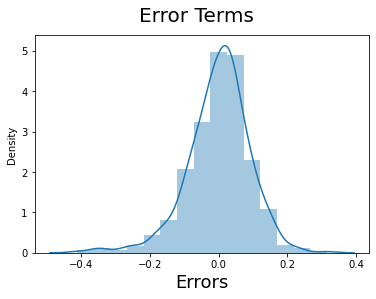

In [78]:
# Plot the histogram of the error terms
res = y_train - y_train_pred

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 15)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)  
plt.show()

## Step 5: Making Predictions Using the Final Model

In [79]:
# scaling the numerical variables using the Min-Max Scaler on the test data-set
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [80]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow/Light Rain,Mist/Broken Clouds
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.146119,0.178082,0.118721,0.100457,0.127854,0.164384,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.354034,0.383458,0.324202,0.301297,0.334692,0.371472,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [81]:
# assigning variables as X and y on the test set
y_test = df_test.pop('cnt')
X_test = df_test

In [82]:
# Adding constant variable to test dataframe
X_test_new = X_test[X.columns]


# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [83]:
X_test_new

,const,yr,workingday,temp,windspeed,summer,winter,Sep,Sun,Light Snow/Light Rain,Mist/Broken Clouds
184,1.0,0,0,0.831783,0.084219,0,0,0,0,0,1
535,1.0,1,1,0.901354,0.153728,1,0,0,0,0,0
299,1.0,0,1,0.511964,0.334206,0,1,0,0,0,1
221,1.0,0,1,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,1,0.817246,0.537414,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,1,0,0.257562,0.287411,0,0,0,0,0,1
702,1.0,1,1,0.519232,0.283397,0,1,0,0,0,0
127,1.0,0,0,0.584649,0.069510,1,0,0,0,0,0
640,1.0,1,1,0.745598,0.052115,0,1,0,0,0,1


In [84]:
# Calculating the y_test_red from the X_test variables of the final model
y_pred = lm.predict(X_test_new)

#### Checking the R-squared on the test set

In [85]:
# Checking the R-square value of the test set
r_squared = r2_score(y_test, y_pred)
r_squared

0.7955844377237248

R-squared score on the test set is **<mark>0.796 </mark>**

## Step 6: Model Evaluation

#### Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'Predicted Test Points')

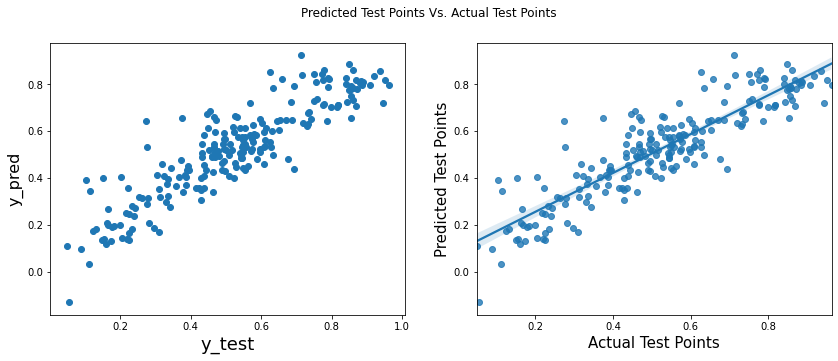

In [86]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.scatter(y_test,y_pred)             
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)

plt.subplot(1,2,2)
corr_plot = sns.regplot(x=y_test, y=y_pred)
plt.suptitle('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})

<Figure size 1008x360 with 0 Axes>

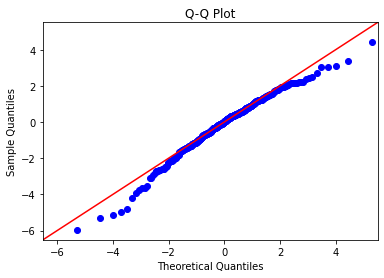

In [87]:
#Plotting Q-Q plot
import scipy.stats as stats
fig = plt.figure(figsize=(14,5))
fig = sm.qqplot(res, stats.t, fit=True, line="45")
plt.title('Q-Q Plot')
plt.show()

Text(0, 0.5, 'y_train_pred')

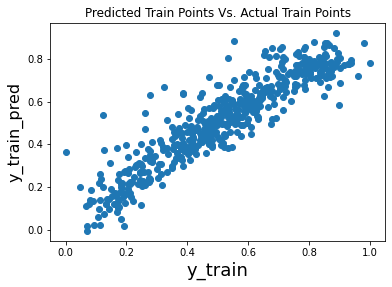

In [88]:
# Plotting y_train and y_train_pred to understand the spread.

plt.title('Predicted Train Points Vs. Actual Train Points')             
plt.scatter(y_train,y_train_pred)          
plt.xlabel('y_train', fontsize=18)                          
plt.ylabel('y_train_pred', fontsize=16)

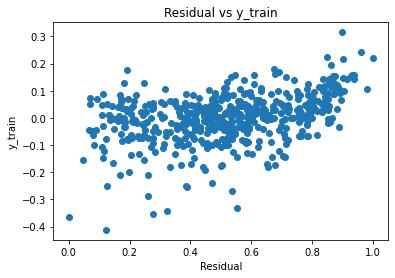

In [89]:
#plotting the scatter plot for residuals for training the dataset
plt.scatter(y_train,res)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.title("Residual vs y_train")
plt.show()

#### Multicollinearity

In [90]:

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']  = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,Sun,1.69
4,summer,1.57
9,Mist/Broken Clouds,1.53
5,winter,1.40
6,Sep,1.20
8,Light Snow/Light Rain,1.08


Inference:
- From the VIF calculation, we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5.

## Step 7: Conclussion

In [91]:
coeff_df.sort_values(by="Coefficient", ascending = False)

,Coefficient
temp,0.549936
yr,0.233056
winter,0.131826
Sep,0.097236
summer,0.087429
Sun,0.067688
workingday,0.056323
Mist/Broken Clouds,-0.081347
windspeed,-0.155238
Light Snow/Light Rain,-0.288021



We can see that the equation of our best fitted line is:

$ cnt = 0.075325 \times (0.549936  \times  temp) + (0.233056  \times  yr) + (0.131826  \times  winter) + (0.097236  \times  Sep) + (0.087429  \times  summer) + (0.067688  \times  Sun) + (0.056323  \times  workingday) + (-0.081347  \times  Mist/Broken Clouds) + (-0.155238  \times  windspeed) + (-0.288021  \times  Light Snow/Light Rain)$


#### Intrepretation of the equation 

The variables are both positively and negetively correlated to the target variable where one unit increase in positive correlated variable will lead to increase in the value of the target variable multiplied by the co-efficient of the respective variable whereas one unit increase in the negative correlated varibale would lead to decrese in the value of the target variable multiplied by the co-efficient of the variable

Model describes the effect of various feature on demand

The model interprets in easier terms as it understandable to the management

#### Significant variables to predict the demand for shared bikes

- Temperature
- Year
- Season
- Weather conditions
- Month
- Weekend